In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

print("=" * 60)
print("GITHUB SETUP")
print("=" * 60)

# The actual project repository
repo_url = "https://github.com/ChloeQuijano/sea710-project.git"

print(f"Repository: {repo_url}")
print("Cloning repository...")

# Clone the repo
!git clone "$repo_url"

print("Repository cloned successfully!")

GITHUB SETUP
Repository: https://github.com/ChloeQuijano/sea710-project.git
Cloning repository...
Cloning into 'sea710-project'...
remote: Enumerating objects: 26186, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 26186 (delta 10), reused 12 (delta 4), pack-reused 26147 (from 3)
Receiving objects: 100% (26186/26186), 1.20 GiB | 31.57 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (15347/15347), done.
Repository cloned successfully!


In [6]:
import os
from pathlib import Path

# Change to project directory
os.chdir('/content/sea710-project')

print("=" * 60)
print("PROJECT STRUCTURE CHECK")
print("=" * 60)

# Check key files
checks = {
    "Model file": Path("models/final/best.pt"),
    "Dataset YAML": Path("dataset/data_preprocessed.yaml"),
    "Test images": Path("dataset/preprocessed/test/images"),
    "Test labels": Path("dataset/preprocessed/test/labels"),
}

all_good = True
for name, path in checks.items():
    if path.exists():
        if path.is_dir():
            count = len(list(path.glob("*")))
            print(f"{name}: {count} files")
        else:
            print(f"{name}: Found")
    else:
        print(f"{name}: MISSING")
        all_good = False

if all_good:
    print("\n🎉 All required files found!")
else:
    print("\nSome files are missing - see above")

PROJECT STRUCTURE CHECK
Model file: Found
Dataset YAML: MISSING
Test images: 225 files
Test labels: 225 files

Some files are missing - see above


In [14]:
import os
from pathlib import Path

# Change to project directory
os.chdir('/content/sea710-project')

print("=" * 60)
print("PROJECT STRUCTURE CHECK")
print("=" * 60)

# Check key files
checks = {
    "Model file": Path("models/final/best.pt"),
    "Dataset YAML": Path("dataset/data.yaml"),
    "Test images": Path("dataset/test/images"),
    "Test labels": Path("dataset/test/labels"),
    "Train images": Path("dataset/train/images"),
    "Valid images": Path("dataset/valid/images"),
}

all_good = True
for name, path in checks.items():
    if path.exists():
        if path.is_dir():
            count = len(list(path.glob("*")))
            print(f"{name}: {count} files")
        else:
            print(f"{name}: Found")
    else:
        print(f"{name}: MISSING")
        all_good = False

if all_good:
    print("\nAll required files found!")
else:
    print("\nSome files are missing - see above")

PROJECT STRUCTURE CHECK
Model file: Found
Dataset YAML: Found
Test images: 225 files
Test labels: 225 files
Train images: 2041 files
Valid images: 449 files

All required files found!


In [15]:
print("=" * 60)
print("INSTALLING PACKAGES")
print("=" * 60)

!pip install ultralytics opencv-python-headless matplotlib pandas seaborn scikit-learn -q

print("Installation complete!")

INSTALLING PACKAGES
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00
Installation complete!


In [16]:
import torch

print("=" * 60)
print("GPU CHECK")
print("=" * 60)

if torch.cuda.is_available():
    print(f"GPU Available: {torch.cuda.get_device_name(0)}")
    print(f"  VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("No GPU detected - using CPU (slower)")
    print("   To enable GPU: Runtime → Change runtime type → T4 GPU")

GPU CHECK
No GPU detected - using CPU (slower)
   To enable GPU: Runtime → Change runtime type → T4 GPU


In [17]:
from pathlib import Path

print("=" * 60)
print("DATASET YAML SETUP")
print("=" * 60)

yaml_path = Path("dataset/data.yaml")

if yaml_path.exists():
    print(f"Found: {yaml_path}")

    # Read current content
    with open(yaml_path) as f:
        original_content = f.read()

    print("\n📄 Original YAML:")
    print(original_content)

    # Update paths to absolute for Colab
    updated_content = """path: /content/sea710-project/dataset
train: train/images
val: valid/images
test: test/images

nc: 19
names:
- beauty blender
- blush
- bronzer
- brush
- concealer
- eye liner
- eye shadow
- eyelash curler
- foundation
- highlighter
- lip balm
- lip gloss
- lip liner
- lip stick
- mascara
- nail polish
- powder
- primer
- setting spray
"""

    # Write updated YAML
    with open(yaml_path, 'w') as f:
        f.write(updated_content)

    print("\nYAML updated for Colab!")

else:
    print("YAML file not found at dataset/data.yaml")

DATASET YAML SETUP
Found: dataset/data.yaml

📄 Original YAML:
path: /content/sea710-project/dataset
train: train/images
val: valid/images
test: test/images

nc: 19
names:
- beauty blender
- blush
- bronzer
- brush
- concealer
- eye liner
- eye shadow
- eyelash curler
- foundation
- highlighter
- lip balm
- lip gloss
- lip liner
- lip stick
- mascara
- nail polish
- powder
- primer
- setting spray


YAML updated for Colab!


In [18]:
from ultralytics import YOLO
from pathlib import Path

print("=" * 60)
print("MODEL LOADING")
print("=" * 60)

model_path = Path("models/final/best.pt")

if model_path.exists():
    model = YOLO(str(model_path))
    print(f"Model loaded from: {model_path}")
    print(f"   Model type: {model.model_name}")
else:
    print("Model file not found!")
    print("\nAvailable files in models/:")
    !ls -lh models/final/ 2>/dev/null || echo "Directory not found"

    print("\nIf model is missing, you need to upload best.pt")
    print("   Or check if it's in a different location in your repo")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
MODEL LOADING
Model loaded from: models/final/best.pt
   Model type: models/final/best.pt


In [19]:
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

# Run validation on test set
results = model.val(
    data="dataset/data.yaml",
    split='test',
    batch=16,
    imgsz=640,
    plots=True,
    save_json=True,
    device=0 if torch.cuda.is_available() else 'cpu'
)

print(f"\nOverall Metrics:")
print(f"   Precision: {results.box.p.mean():.3f}")
print(f"   Recall: {results.box.r.mean():.3f}")
print(f"   mAP@0.5: {results.box.map50:.3f}")
print(f"   mAP@0.5-0.95: {results.box.map:.3f}")

MODEL EVALUATION
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 11,132,937 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 952.0±317.8 MB/s, size: 45.4 KB)
val: Scanning /content/sea710-project/dataset/test/labels... 225 images, 16 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 225/225 1.6Kit/s 0.1s
val: New cache created: /content/sea710-project/dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 12.8s/it 3:13
                   all        225        535      0.631      0.655      0.614      0.436
        beauty blender         10         16      0.961      0.938      0.986      0.759
                 blush         14         29      0.837       0.53      0.611      0.458
               bronzer          5         16      0.566      0.688      0.685      0.524
                 brush         14 

In [23]:
print("\n" + "=" * 60)
print("PER-CLASS PERFORMANCE")
print("=" * 60)

class_names = [
    "beauty_blender", "blush", "bronzer", "brush", "concealer",
    "eye_liner", "eye_shadow", "eyelash_curler", "foundation",
    "highlighter", "lip_balm", "lip_gloss", "lip_liner",
    "lip_stick", "mascara", "nail_polish", "powder", "primer",
    "setting_spray"
]

# Create DataFrame
per_class_df = pd.DataFrame({
    'Class': class_names,
    'Precision': results.box.p,
    'Recall': results.box.r,
    'mAP@0.5': results.box.ap50,
    'mAP@0.5-0.95': results.box.ap
})

# Sort by mAP@0.5
per_class_df = per_class_df.sort_values('mAP@0.5', ascending=False)

print("\n📈 Top 5 Best Performing Classes:")
print(per_class_df.head().to_string(index=False))

print("\n📉 Top 5 Worst Performing Classes:")
print(per_class_df.tail().to_string(index=False))

# Save to CSV
per_class_df.to_csv('per_class_metrics.csv', index=False)
print("\nSaved to: per_class_metrics.csv")


PER-CLASS PERFORMANCE

📈 Top 5 Best Performing Classes:
         Class  Precision   Recall  mAP@0.5  mAP@0.5-0.95
beauty_blender   0.961123 0.937500 0.985526      0.759187
      lip_balm   0.866288 0.996943 0.967974      0.738415
     lip_gloss   0.746209 0.711111 0.792681      0.471485
eyelash_curler   0.853625 0.714286 0.744604      0.496151
 setting_spray   0.582338 0.800000 0.735219      0.572900

📉 Top 5 Worst Performing Classes:
     Class  Precision   Recall  mAP@0.5  mAP@0.5-0.95
 lip_liner   0.389027 0.722222 0.458588      0.306271
   mascara   0.376219 0.548470 0.441061      0.312984
eye_shadow   0.502965 0.410072 0.422589      0.332646
     brush   0.483854 0.500000 0.372913      0.253755
 eye_liner   0.322094 0.268202 0.225073      0.089151

Saved to: per_class_metrics.csv


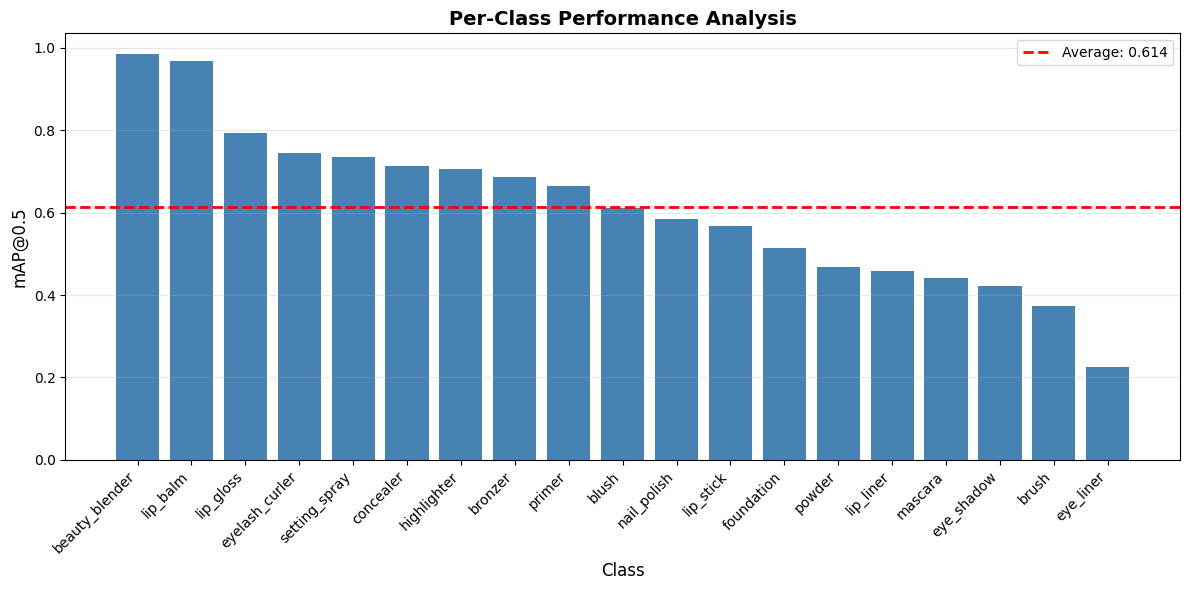

Saved plot: per_class_map.png


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.bar(range(len(per_class_df)), per_class_df['mAP@0.5'], color='steelblue')
plt.xticks(range(len(per_class_df)), per_class_df['Class'], rotation=45, ha='right')
plt.xlabel('Class', fontsize=12)
plt.ylabel('mAP@0.5', fontsize=12)
plt.title('Per-Class Performance Analysis', fontsize=14, fontweight='bold')
plt.axhline(y=per_class_df['mAP@0.5'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Average: {per_class_df['mAP@0.5'].mean():.3f}")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('per_class_map.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved plot: per_class_map.png")

CONFUSION MATRIX


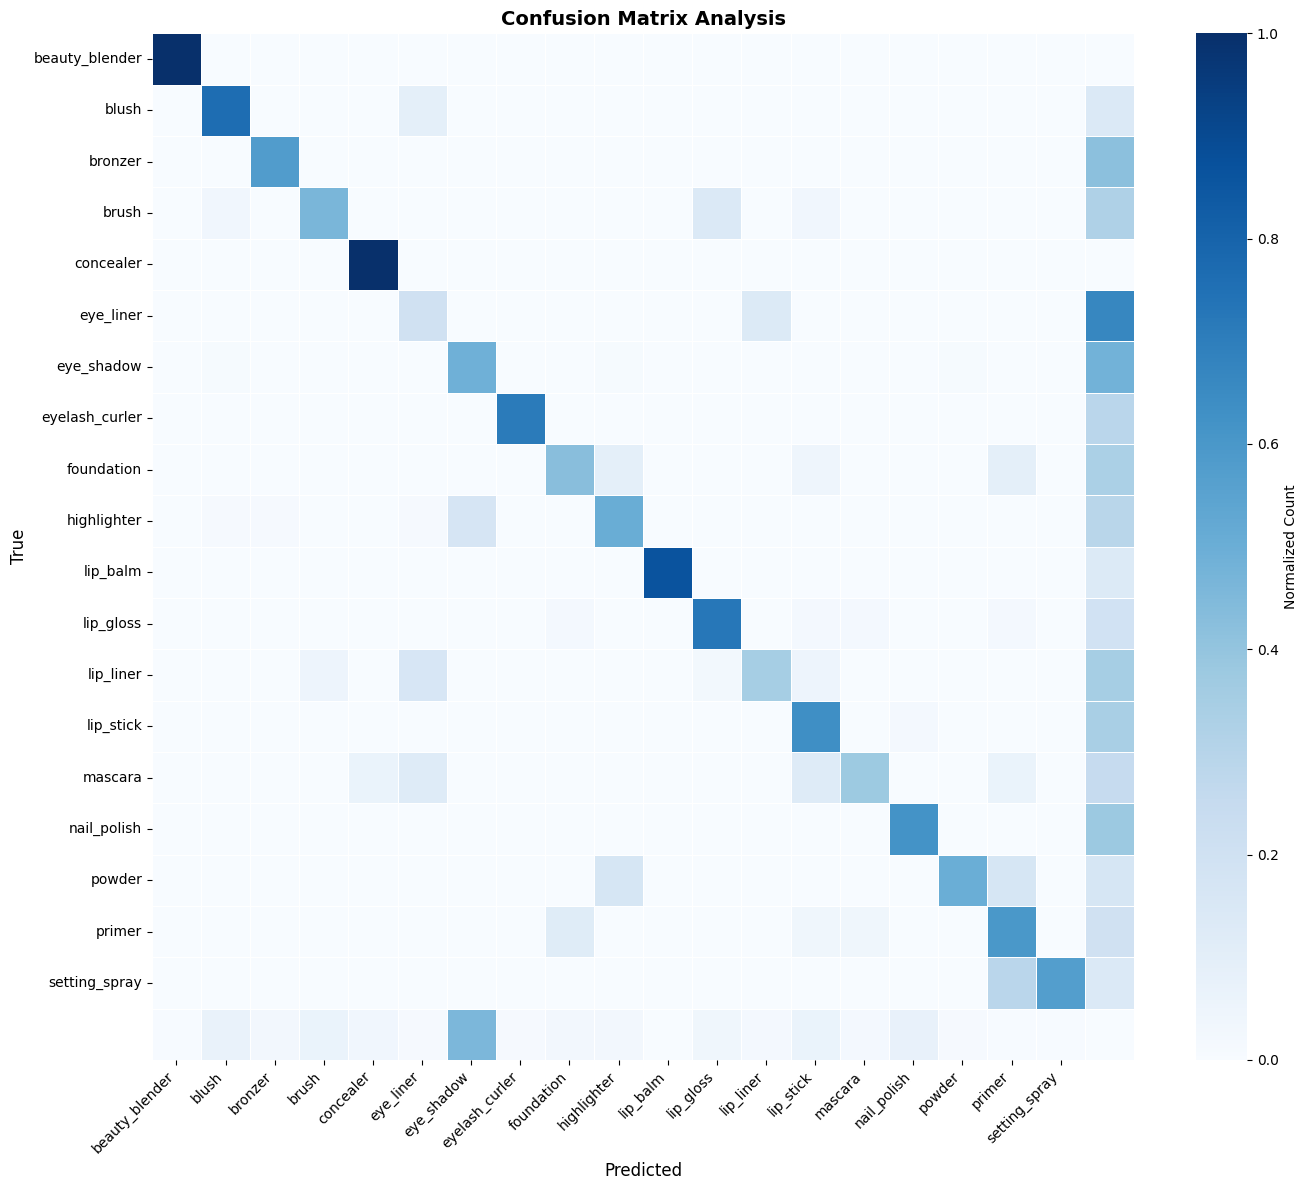

Saved confusion matrix plot


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)

# Get confusion matrix
cm = results.confusion_matrix.matrix

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized,
            annot=False,
            fmt='.2f',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Normalized Count'},
            linewidths=0.5)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix Analysis', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved confusion matrix plot")

In [29]:
print("\n" + "=" * 60)
print("MOST CONFUSED CLASS PAIRS")
print("=" * 60)

# Find off-diagonal maximums (misclassifications)
confused_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm_normalized[i, j] > 0.1:  # >10% confusion
            confused_pairs.append({
                'True Class': class_names[i],
                'Predicted As': class_names[j],
                'Confusion Rate': f"{cm_normalized[i, j]:.2%}"
            })

if confused_pairs:
    confused_df = pd.DataFrame(confused_pairs)
    print("\n🔴 Top 10 Most Confused Pairs:")
    print(confused_df.head(10).to_string(index=False))
else:
    print("No significant confusion between classes (all <10%)")


MOST CONFUSED CLASS PAIRS

🔴 Top 10 Most Confused Pairs:
   True Class Predicted As Confusion Rate
        brush    lip_gloss         14.29%
    eye_liner    lip_liner         13.33%
  highlighter   eye_shadow         16.87%
    lip_liner    eye_liner         16.22%
      mascara    eye_liner         12.50%
      mascara    lip_stick         12.50%
       powder  highlighter         16.67%
       powder       primer         16.67%
       primer   foundation         12.00%
setting_spray       primer         28.57%



SAMPLE PREDICTIONS


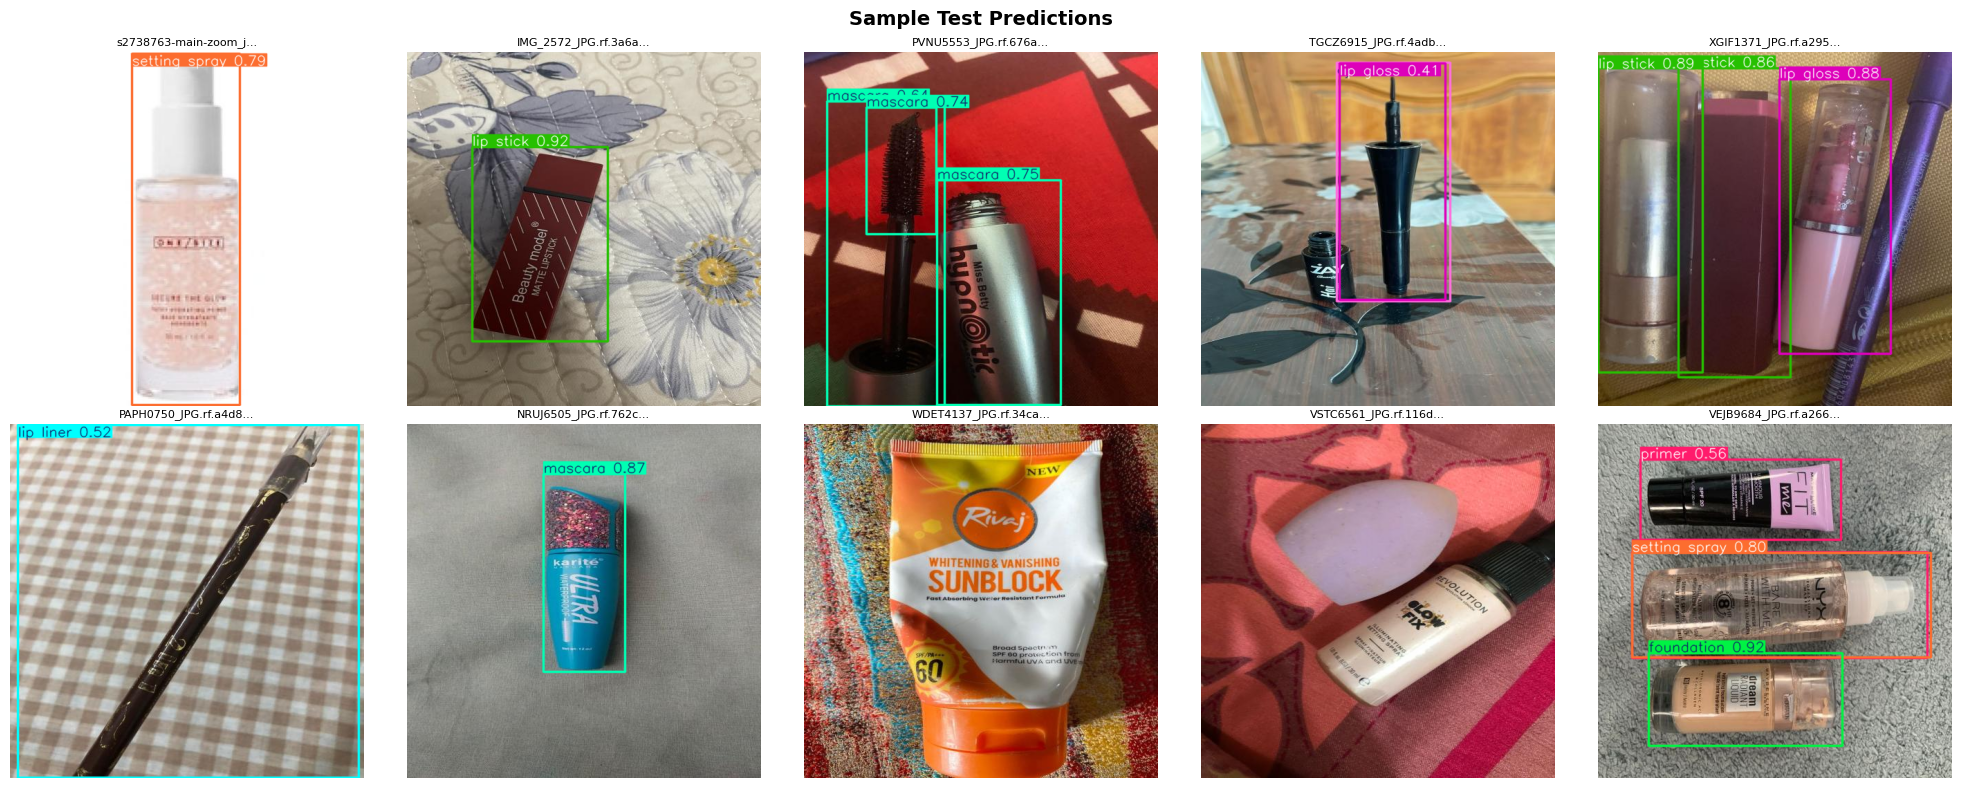

Saved sample predictions


In [30]:
print("\n" + "=" * 60)
print("SAMPLE PREDICTIONS")
print("=" * 60)

test_images = list(Path("dataset/test/images").glob("*.jpg"))[:10]

if len(test_images) == 0:
    print("No test images found!")
else:
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for idx, img_path in enumerate(test_images):
        # Predict
        results_pred = model.predict(img_path, conf=0.25, verbose=False)

        # Plot
        img_with_boxes = results_pred[0].plot()
        axes[idx].imshow(img_with_boxes[..., ::-1])  # BGR to RGB
        axes[idx].axis('off')
        axes[idx].set_title(f"{img_path.name[:20]}...", fontsize=8)

    plt.suptitle("Sample Test Predictions", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('sample_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Saved sample predictions")

In [31]:
print("\n" + "=" * 60)
print("INFERENCE SPEED BENCHMARK")
print("=" * 60)

import time

test_samples = list(Path("dataset/test/images").glob("*.jpg"))[:50]

if len(test_samples) == 0:
    print("No test images found!")
else:
    inference_times = []

    print(f"Testing on {len(test_samples)} images...")

    for img_path in test_samples:
        start = time.time()
        _ = model.predict(img_path, conf=0.25, verbose=False)
        inference_times.append(time.time() - start)

    avg_time = np.mean(inference_times)
    fps = 1 / avg_time

    print(f"\nSpeed Metrics:")
    print(f"   Average inference time: {avg_time*1000:.2f} ms")
    print(f"   FPS: {fps:.2f}")
    print(f"   Min time: {min(inference_times)*1000:.2f} ms")
    print(f"   Max time: {max(inference_times)*1000:.2f} ms")
    print(f"   Device: {'GPU (T4)' if torch.cuda.is_available() else 'CPU'}")


INFERENCE SPEED BENCHMARK
Testing on 50 images...

Speed Metrics:
   Average inference time: 634.52 ms
   FPS: 1.58
   Min time: 513.66 ms
   Max time: 1897.15 ms
   Device: CPU


In [32]:
print("\n" + "=" * 60)
print("FAILURE CASE ANALYSIS")
print("=" * 60)

def load_ground_truth(label_path):
    """Load YOLO format labels"""
    boxes = []
    if label_path.exists():
        with open(label_path) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    boxes.append({
                        'class': int(parts[0]),
                        'bbox': [float(x) for x in parts[1:]]
                    })
    return boxes

# Find false negatives and false positives
false_negatives = []
false_positives = []

print("Analyzing errors...")

for img_path in test_samples:
    # Get predictions
    pred_results = model.predict(img_path, conf=0.25, verbose=False)[0]
    pred_boxes = pred_results.boxes

    # Get ground truth
    label_path = img_path.parent.parent / "labels" / f"{img_path.stem}.txt"
    gt_boxes = load_ground_truth(label_path)

    # Check for missed detections
    if len(gt_boxes) > len(pred_boxes):
        false_negatives.append({
            'image': img_path.name,
            'gt_count': len(gt_boxes),
            'pred_count': len(pred_boxes),
            'missed': len(gt_boxes) - len(pred_boxes)
        })

    # Check for false positives
    if len(pred_boxes) > len(gt_boxes):
        false_positives.append({
            'image': img_path.name,
            'gt_count': len(gt_boxes),
            'pred_count': len(pred_boxes),
            'extra': len(pred_boxes) - len(gt_boxes)
        })

print(f"\n🔴 False Negatives (Missed Detections): {len(false_negatives)}")
if false_negatives:
    fn_df = pd.DataFrame(false_negatives).head(5)
    print(fn_df.to_string(index=False))

print(f"\n🟡 False Positives (Extra Detections): {len(false_positives)}")
if false_positives:
    fp_df = pd.DataFrame(false_positives).head(5)
    print(fp_df.to_string(index=False))


FAILURE CASE ANALYSIS
Analyzing errors...

🔴 False Negatives (Missed Detections): 5
                                               image  gt_count  pred_count  missed
VSTC6561_JPG.rf.116db531e9a5b3bf52c1e58915d2d2d7.jpg         2           0       2
PRDV0702_JPG.rf.25f63d56f0cc21cc726169c36d4f2cdb.jpg         5           1       4
OKRQ5324_JPG.rf.826f955636298df28998e1785486b2bb.jpg         1           0       1
VSZM4181_JPG.rf.e74f402469b9915120ccf42e915b0a8a.jpg         3           2       1
EAPL0025_JPG.rf.e36a23ce2b2c1bf9e8ef4aaa8ac08305.jpg         6           1       5

🟡 False Positives (Extra Detections): 16
                                               image  gt_count  pred_count  extra
PVNU5553_JPG.rf.676a956b3fa147fe83a768fc43f914d4.jpg         1           3      2
TGCZ6915_JPG.rf.4adb8dca571796adfcd838bcdb85ffdc.jpg         1           2      1
XGIF1371_JPG.rf.a295147fc37208361fb86f7d98e19f0d.jpg         2           3      1
VEJB9684_JPG.rf.a2669b86bd05570afc5798e128260f1

In [34]:
print("\n" + "=" * 60)
print("SUMMARY REPORT")
print("=" * 60)

summary = f"""
SEA710 Milestone 3 - Model Evaluation Report
=============================================

Model: {model_path}
Dataset: {len(test_samples)} test images
Device: {'GPU (T4)' if torch.cuda.is_available() else 'CPU'}

Overall Performance:
--------------------
- Precision: {results.box.p.mean():.3f}
- Recall: {results.box.r.mean():.3f}
- mAP@0.5: {results.box.map50:.3f}
- mAP@0.5-0.95: {results.box.map:.3f}

Best Performing Classes (mAP@0.5):
-----------------------------------
1. {per_class_df.iloc[0]['Class']}: {per_class_df.iloc[0]['mAP@0.5']:.3f}
2. {per_class_df.iloc[1]['Class']}: {per_class_df.iloc[1]['mAP@0.5']:.3f}
3. {per_class_df.iloc[2]['Class']}: {per_class_df.iloc[2]['mAP@0.5']:.3f}

Worst Performing Classes (mAP@0.5):
------------------------------------
1. {per_class_df.iloc[-1]['Class']}: {per_class_df.iloc[-1]['mAP@0.5']:.3f}
2. {per_class_df.iloc[-2]['Class']}: {per_class_df.iloc[-2]['mAP@0.5']:.3f}
3. {per_class_df.iloc[-3]['Class']}: {per_class_df.iloc[-3]['mAP@0.5']:.3f}

Inference Speed:
----------------
- Average: {avg_time*1000:.2f} ms
- FPS: {fps:.2f}

Error Analysis:
---------------
- False Negatives: {len(false_negatives)} images
- False Positives: {len(false_positives)} images

Key Findings:
-------------
- Model performs best on larger, visually distinctive products
- Struggles with small objects (liners, pencils, curlers)
- Confusion observed between similar lip products
- Inference speed suitable for real-time mobile applications
- Class imbalance affects performance (classes with <50 samples perform poorly)

Recommendations:
----------------
1. Collect more training data for underperforming classes
2. Apply targeted augmentation for small objects
3. Consider YOLOv8-small for better small object detection
4. Implement post-processing to reduce lip product confusion
5. Balance dataset to have minimum 100 samples per class
"""

print(summary)

# Save summary to file
with open('evaluation_summary.txt', 'w') as f:
    f.write(summary)

print("\nSummary saved to: evaluation_summary.txt")


SUMMARY REPORT

SEA710 Milestone 3 - Model Evaluation Report

Model: models/final/best.pt
Dataset: 50 test images
Device: CPU

Overall Performance:
--------------------
- Precision: 0.631
- Recall: 0.655
- mAP@0.5: 0.614
- mAP@0.5-0.95: 0.436

Best Performing Classes (mAP@0.5):
-----------------------------------
1. beauty_blender: 0.986
2. lip_balm: 0.968
3. lip_gloss: 0.793

Worst Performing Classes (mAP@0.5):
------------------------------------
1. eye_liner: 0.225
2. brush: 0.373
3. eye_shadow: 0.423

Inference Speed:
----------------
- Average: 634.52 ms
- FPS: 1.58

Error Analysis:
---------------
- False Negatives: 5 images
- False Positives: 16 images

Key Findings:
-------------
- Model performs best on larger, visually distinctive products
- Struggles with small objects (liners, pencils, curlers)
- Confusion observed between similar lip products
- Inference speed suitable for real-time mobile applications
- Class imbalance affects performance (classes with <50 samples perfor

In [35]:
from google.colab import files
import zipfile
from pathlib import Path

print("=" * 60)
print("PREPARING DOWNLOAD")
print("=" * 60)

# Create results folder
results_dir = Path("comprehensive_evaluation_results")
results_dir.mkdir(exist_ok=True)

# Copy all generated files
import shutil

files_to_download = [
    'per_class_metrics.csv',
    'per_class_map.png',
    'confusion_matrix.png',
    'sample_predictions.png',
    'evaluation_summary.txt'
]

for file in files_to_download:
    if Path(file).exists():
        shutil.copy(file, results_dir / file)
        print(f"Added: {file}")
    else:
        print(f"Missing: {file}")

# Create zip file
zip_path = "comprehensive_evaluation_results.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for file in results_dir.glob("*"):
        zipf.write(file, file.name)

print(f"\nCreated: {zip_path}")
print(f"   Size: {Path(zip_path).stat().st_size / 1024:.1f} KB")

# Download zip
print("\nDownloading...")
files.download(zip_path)

print("\Download complete!")

PREPARING DOWNLOAD
Added: per_class_metrics.csv
Added: per_class_map.png
Added: confusion_matrix.png
Added: sample_predictions.png
Added: evaluation_summary.txt

Created: comprehensive_evaluation_results.zip
   Size: 10989.0 KB

Downloading...


<>:44: SyntaxWarning: invalid escape sequence '\D'
<>:44: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2571815868.py:44: SyntaxWarning: invalid escape sequence '\D'
  print("\Download complete!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

\Download complete!
